In [1]:
import os
import random
import numpy as np
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt

# Dataset Directory

In [2]:
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/Animals"


# Function to fetch categories

In [3]:
def fetch_labels(data_path):
    """Fetch class labels from the dataset directory."""
    return os.listdir(data_path)

# Function to preprocess and load dataset

In [4]:
def preprocess_data(labels, data_path):
    """Load and preprocess dataset images."""
    data = []
    for label in labels:
        label_path = os.path.join(data_path, label)
        label_index = labels.index(label)
        for img_name in tqdm(os.listdir(label_path)):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img, (32, 32))
            data.append([resized_img, label_index])
    random.shuffle(data)
    return data

# Function to calculate Euclidean distance


In [5]:
def euclidean_distance(img1, img2):
    """Compute Euclidean distance."""
    return np.sqrt(np.sum((img1 - img2) ** 2))

# k-NN implementation
def knn_classifier(test_data, train_data, k_neighbors=5):
    """Classify using k-NN and return accuracy."""
    correct = 0
    for test_img, test_label in tqdm(test_data):
        distances = []
        for train_img, train_label in train_data:
            dist = euclidean_distance(test_img, train_img)
            distances.append((dist, train_label))
        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k_neighbors]]
        predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        if predicted_label == test_label:
            correct += 1
    return correct / len(test_data)

# 5-Fold Cross Validation

In [6]:
def cross_validate(data, folds=5, k_neighbors=3):
    """Perform cross-validation and return fold accuracies."""
    fold_size = len(data) // folds
    accuracies = []
    for i in range(folds):
        validation_data = data[i * fold_size:(i + 1) * fold_size]
        training_data = data[:i * fold_size] + data[(i + 1) * fold_size:]
        accuracy = knn_classifier(validation_data, training_data, k_neighbors=k_neighbors)
        accuracies.append(accuracy)
    return accuracies

# Main Program

In [7]:
labels = fetch_labels(DATA_DIR)
dataset = preprocess_data(labels, DATA_DIR)

# Test different K values
k_values = list(range(1, 31))
results = {}

for k in k_values:
    print(f"Testing K={k}")
    fold_accuracies = cross_validate(dataset, folds=5, k_neighbors=k)
    results[k] = fold_accuracies

100%|██████████| 30/30 [00:18<00:00,  1.67it/s]


Testing K=1


100%|██████████| 34/34 [00:00<00:00, 1063.95it/s]


Testing K=2


100%|██████████| 34/34 [00:00<00:00, 1064.59it/s]


Testing K=3


100%|██████████| 34/34 [00:00<00:00, 919.37it/s]


Testing K=4


100%|██████████| 34/34 [00:00<00:00, 795.73it/s]


Testing K=5


100%|██████████| 34/34 [00:00<00:00, 1092.70it/s]


Testing K=6


100%|██████████| 34/34 [00:00<00:00, 1058.96it/s]


Testing K=7


100%|██████████| 34/34 [00:00<00:00, 1061.94it/s]


Testing K=8


100%|██████████| 34/34 [00:00<00:00, 947.44it/s]


Testing K=9


100%|██████████| 34/34 [00:00<00:00, 786.36it/s]


Testing K=10


100%|██████████| 34/34 [00:00<00:00, 1029.78it/s]


Testing K=11


100%|██████████| 34/34 [00:00<00:00, 1039.46it/s]


Testing K=12


100%|██████████| 34/34 [00:00<00:00, 1003.84it/s]


Testing K=13


100%|██████████| 34/34 [00:00<00:00, 764.83it/s]


Testing K=14


100%|██████████| 34/34 [00:00<00:00, 886.06it/s]


Testing K=15


100%|██████████| 34/34 [00:00<00:00, 1059.57it/s]


Testing K=16


100%|██████████| 34/34 [00:00<00:00, 1063.73it/s]


Testing K=17


100%|██████████| 34/34 [00:00<00:00, 1071.87it/s]


Testing K=18


100%|██████████| 34/34 [00:00<00:00, 767.60it/s]


Testing K=19


100%|██████████| 34/34 [00:00<00:00, 698.12it/s]


Testing K=20


100%|██████████| 34/34 [00:00<00:00, 1022.46it/s]


Testing K=21


100%|██████████| 34/34 [00:00<00:00, 980.23it/s]


Testing K=22


100%|██████████| 34/34 [00:00<00:00, 1029.83it/s]


Testing K=23


100%|██████████| 34/34 [00:00<00:00, 827.91it/s]


Testing K=24


100%|██████████| 34/34 [00:00<00:00, 739.02it/s]


Testing K=25


100%|██████████| 34/34 [00:00<00:00, 1074.69it/s]


Testing K=26


100%|██████████| 34/34 [00:00<00:00, 960.24it/s]


Testing K=27


100%|██████████| 34/34 [00:00<00:00, 781.70it/s]


Testing K=28


100%|██████████| 34/34 [00:00<00:00, 800.74it/s]


Testing K=29


100%|██████████| 34/34 [00:00<00:00, 1031.54it/s]


Testing K=30


100%|██████████| 34/34 [00:00<00:00, 1063.39it/s]


# Calculate average accuracies

In [8]:
average_accuracies = []
for k, accs in results.items():
    average_accuracies.append(np.mean(accs))

# Plot Results

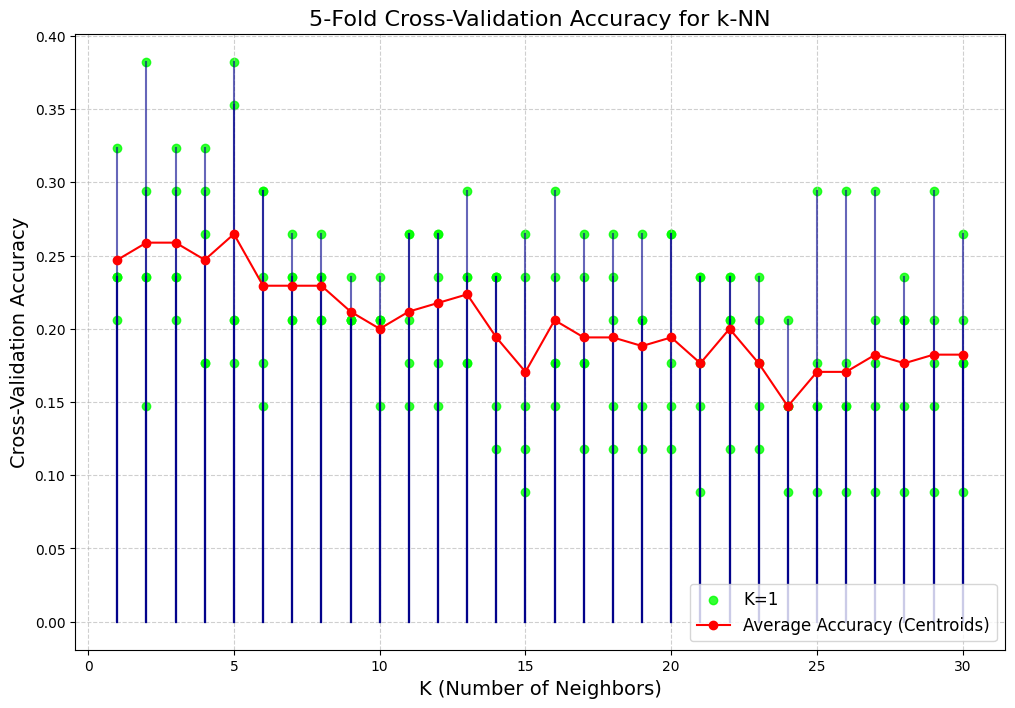

K=1: Average Accuracy = 24.71%
K=2: Average Accuracy = 25.88%
K=3: Average Accuracy = 25.88%
K=4: Average Accuracy = 24.71%
K=5: Average Accuracy = 26.47%
K=6: Average Accuracy = 22.94%
K=7: Average Accuracy = 22.94%
K=8: Average Accuracy = 22.94%
K=9: Average Accuracy = 21.18%
K=10: Average Accuracy = 20.00%
K=11: Average Accuracy = 21.18%
K=12: Average Accuracy = 21.76%
K=13: Average Accuracy = 22.35%
K=14: Average Accuracy = 19.41%
K=15: Average Accuracy = 17.06%
K=16: Average Accuracy = 20.59%
K=17: Average Accuracy = 19.41%
K=18: Average Accuracy = 19.41%
K=19: Average Accuracy = 18.82%
K=20: Average Accuracy = 19.41%
K=21: Average Accuracy = 17.65%
K=22: Average Accuracy = 20.00%
K=23: Average Accuracy = 17.65%
K=24: Average Accuracy = 14.71%
K=25: Average Accuracy = 17.06%
K=26: Average Accuracy = 17.06%
K=27: Average Accuracy = 18.24%
K=28: Average Accuracy = 17.65%
K=29: Average Accuracy = 18.24%
K=30: Average Accuracy = 18.24%


In [15]:
# Plot Results
plt.figure(figsize=(12, 8))
plt.title("5-Fold Cross-Validation Accuracy for k-NN", fontsize=16)
plt.xlabel("K (Number of Neighbors)", fontsize=14)
plt.ylabel("Cross-Validation Accuracy", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Colors for plotting
line_color = 'darkblue'
scatter_color = 'lime'

# Vertical line plot for each k-value
for k, accs in results.items():
    for acc in accs:
        plt.plot([k, k], [0, acc], color=line_color, alpha=0.6)  # Vertical lines
    plt.scatter([k] * len(accs), accs, color=scatter_color, label=f"K={k}" if k == 1 else "", alpha=0.8)

# Line plot for average accuracies
plt.plot(k_values, average_accuracies, marker='o', color='red', label="Average Accuracy (Centroids)", linestyle='-')

# Show Plot
plt.legend(fontsize=12, loc="lower right")
plt.show()

# Print Average Accuracies
for k, avg in zip(k_values, average_accuracies):
    print(f"K={k}: Average Accuracy = {avg * 100:.2f}%")